Epoch [100/1000], Loss: 23.3023
Epoch [200/1000], Loss: 10.3761
Epoch [300/1000], Loss: 2.1809
Epoch [400/1000], Loss: 0.3651
Epoch [500/1000], Loss: 0.1878
Epoch [600/1000], Loss: 0.1717
Epoch [700/1000], Loss: 0.1665
Epoch [800/1000], Loss: 0.1620
Epoch [900/1000], Loss: 0.1576
Epoch [1000/1000], Loss: 0.1534


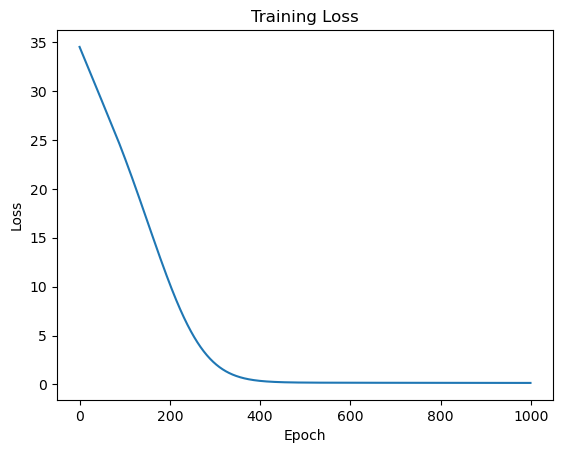

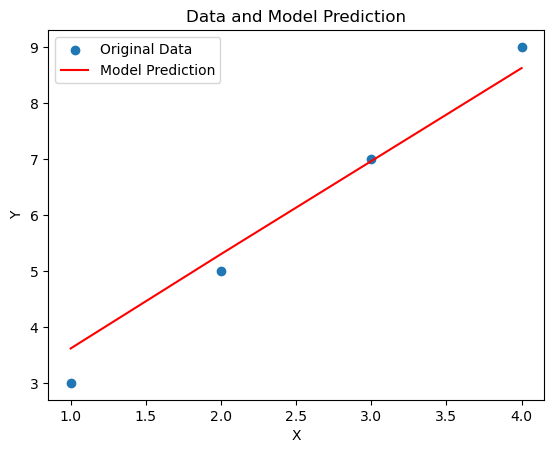

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 构建一个更复杂的模型


class ComplexModel(nn.Module):
    def __init__(self):
        super(ComplexModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # 第一个全连接层
        self.fc2 = nn.Linear(10, 5)  # 第二个全连接层
        self.fc3 = nn.Linear(5, 1)   # 输出层

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用ReLU作为激活函数
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# 创建复杂模型实例
model = ComplexModel()

# 设置学习率和优化器
learning_rate = 0.0001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 定义训练数据和标签
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

# 定义训练迭代次数
num_epochs = 1000

# 存储损失值
losses = []

# 进行训练
for epoch in range(num_epochs):
    # 前向传播
    y_pred = model(x)

    # 计算损失
    loss = nn.MSELoss()(y_pred, y)

    # 梯度清零
    optimizer.zero_grad()

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 绘制训练过程中的损失曲线
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# 绘制原始数据点和模型预测结果
with torch.no_grad():
    y_pred = model(x)

plt.scatter(x, y, label='Original Data')
plt.plot(x, y_pred, color='red', label='Model Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and Model Prediction')
plt.legend()
plt.show()